# Portofolio management using Numpy

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

In [0]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

In [0]:
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

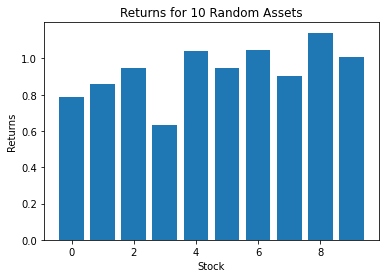

In [0]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

# Clcaulate expected return 

In [0]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

In [0]:
p_returns = np.dot (weights, mean_returns)
print ("Expected return of the portofolio: ", p_returns)


Expected return of the portofolio:  0.9317431574576972


Linear algebra is pervasive in finance and in general. For example, the calculation of optimal weights according to modern portfolio theory is done using linear algebra techniques. The arrays and functions in NumPy allow us to handle these calculations in an intuitive way. For a quick intro to linear algebra and how to use NumPy to do more significant matrix calculations, proceed to the next section.

# Matrix multiplication
With matrix multiplication, the order in which the matrices are multiplied matters. Multiplying a matrix on the left side by another matrix may be just fine, but multiplying on the right may be undefined.

# Portfolio Variance
First, we calculate the covariance matrix that relates all the individual stocks in our universe.

In [0]:
cov_mat = np.cov(returns)
print(cov_mat)

[[0.00061075 0.00059685 0.00056904 0.00060991 0.00058923 0.00057248
  0.0006599  0.00057706 0.00059378 0.00056432]
 [0.00059685 0.00092951 0.00057371 0.00061286 0.00057954 0.00054788
  0.00062912 0.0005514  0.00060127 0.0005081 ]
 [0.00056904 0.00057371 0.00098483 0.00049571 0.00063764 0.00050221
  0.00062508 0.00049855 0.00050227 0.00051605]
 [0.00060991 0.00061286 0.00049571 0.00098807 0.00056036 0.00055204
  0.00061949 0.00061121 0.00059092 0.00055885]
 [0.00058923 0.00057954 0.00063764 0.00056036 0.00099974 0.00054974
  0.00062025 0.00056672 0.00059125 0.00055386]
 [0.00057248 0.00054788 0.00050221 0.00055204 0.00054974 0.00089777
  0.00067234 0.00058119 0.0005517  0.00061024]
 [0.0006599  0.00062912 0.00062508 0.00061949 0.00062025 0.00067234
  0.00107506 0.00060486 0.0006372  0.00053201]
 [0.00057706 0.0005514  0.00049855 0.00061121 0.00056672 0.00058119
  0.00060486 0.00089826 0.00056373 0.00063387]
 [0.00059378 0.00060127 0.00050227 0.00059092 0.00059125 0.0005517
  0.0006372  

 For a reference on the evaluation of the variance of a portfolio as a matrix equation, please see the Wikipedia article on [modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory).

In [0]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

In [0]:
print(A)

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]


In [0]:
print(np.transpose(A))

[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


# Calculate the portofolio volatility 

In [0]:
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print("Portofolio volatility: ", vol_p)

Portofolio volatility:  0.025105103232758816


In [0]:
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof = 1))
print ("Portofolio volatility: ", vol_p_alt)

Portofolio volatility:  0.025105103232758812


# Portofolio management using Pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we simulate some returns in NumPy, put them into a pandas DataFrame, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

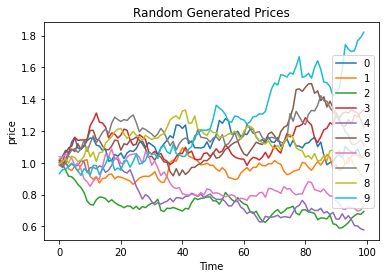

In [0]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices =returns.cumprod()
prices.plot()
plt.title('Random Generated Prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend(loc=0)
plt.show()

# Pandas Data Structure

In [0]:
s = pd.Series([1, 2, np.nan, 4, 5])

s.name = 'Toy series'
print (s.name) 

Toy series


In [0]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [0]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [0]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


In [0]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, dtype: float64